# Linear Regression

In [1]:
import pandas as pd
df = pd.read_csv('data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [5]:
df.drop(['Unnamed: 0'],axis=1, inplace = True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

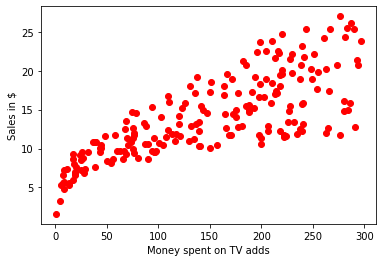

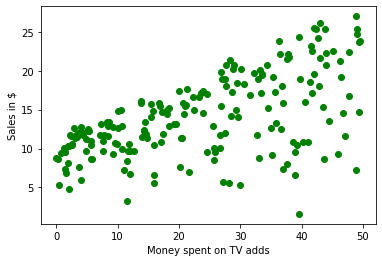

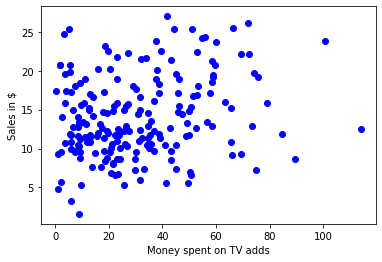

In [18]:
import random
col = ['red', 'blue', 'green', 'orange']
for attr in ['TV', 'radio', 'newspaper']:
    plt.scatter(df[attr], df['sales'], c = random.choice(col))
    plt.xlabel("Money spent on TV adds")
    plt.ylabel("Sales in $")
    plt.show()

In [92]:
X = df['TV'].values.reshape(-1, 1)
y = df['sales'].values.reshape(-1, 1)

lr = LinearRegression()

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


In [94]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lr.coef_[0][0]

0.04821737994071257

In [96]:
lr.intercept_[0]

6.8117315981477775

In [100]:
from sklearn.metrics import r2_score
1 - r2_score(lr.predict(X), y)

0.6175908166438994

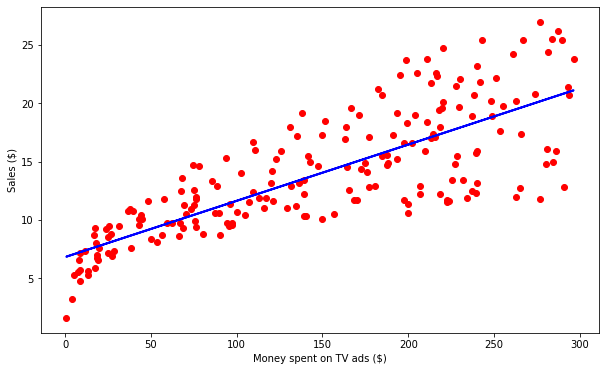

In [59]:
plt.figure(figsize = (10, 6))
plt.scatter(df['TV'],df['sales'],c='red')
plt.plot(df['TV'], lr.predict(df['TV'].values.reshape(-1, 1)),c='blue',linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

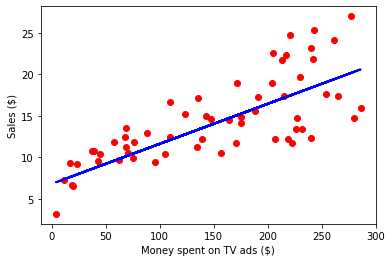

In [56]:
plt.scatter(x_test,y_test,c='red')
plt.plot(x_test, lr.predict(x_test),c='blue',linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [70]:
X = df['TV']
y = df['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        15:30:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# Multi Linear Regression

In [86]:
X = df.iloc[:, :-1]
y = df['sales'].values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [87]:
lr.intercept_

array([2.93888937])

In [88]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [91]:
r2_score(lr.predict(X), y)

0.8854345262449441

In [81]:
X = np.column_stack((df['TV'], df['radio'], df['newspaper']))
y = df['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        15:36:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0